In [1]:
# During sentiment analysis we need different operations in different steps of preprocessing.
# Many of these different NLP operations are bundled together in the TextHero library. 
# That's why I used this library. This has saved me less code and time.

In [1]:
import pandas as pd
import texthero as hero

ModuleNotFoundError: No module named 'texthero'

In [4]:
df = pd.read_csv('G:/Learning/My jupyter csv files/tweet obama.csv')

 Normally using stopwords only deletes all the default stopwords.
 
 But here I need to remove some stopwords besides the default words. 
 So I have to use custom stopwords

In [6]:
custom_stopwords = ['https', 'http']

In [7]:
# for text preprocessing 'TextHero' is extremely useful for cleaning, visualizing.
# 'TextHero' saves time by using custom_function 
# I don't need to clean data using different functions separately.
# That's why I use texthero 

from texthero import preprocessing as pp

custom_pipeline = [pp.lowercase, pp.remove_punctuation, 
                   pp.remove_html_tags, 
                   pp.remove_urls, 
                  pp.remove_brackets,
                  pp.remove_curly_brackets, pp.remove_whitespace,
                  pp.remove_stopwords, lambda x: hero.remove_stopwords(x, stopwords=custom_stopwords)]

In [8]:
df['after_cleaning_text'] = df['text'].pipe(hero.clean, custom_pipeline)
df.head()

created_at                                               text  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...   
2    9/30/17 2:22  Proud to cheer on Team USA at the Invictus Gam...   
3   9/26/17 17:03  We're expanding our efforts to help Puerto Ric...   
4   9/25/17 23:36  Prosecutor, soldier, family man, citizen. Beau...   

                                                 url  replies  retweets  \
0  https://twitter.com/BarackObama/status/9200615...    17064     89916   
1  https://twitter.com/BarackObama/status/9148326...    21588    405895   
2  https://twitter.com/BarackObama/status/9139520...     8476     60651   
3  https://twitter.com/BarackObama/status/9127244...    10657    113807   
4  https://twitter.com/BarackObama/status/9124608...     3886     58449   

   favorites         user                                after_cleaning_text  
0     641842  BarackObama    grateful  senjohnmccain   lifetime  service ...  
1    1715753  BarackObama  michelle amp   praying   victims  las vegas  t...  
2     503255  BarackObama  proud  cheer  team usa   invictus games today ...  
3     334901  BarackObama    expanding  efforts  help puerto rico amp  us...  
4     328106  BarackObama  prosecutor soldier family man citizen beau mad...

### Tokenize the data

In [9]:
from nltk.tokenize import word_tokenize
df['tokenize'] = df['after_cleaning_text'].apply(word_tokenize)
df.head()

created_at                                               text  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...   
2    9/30/17 2:22  Proud to cheer on Team USA at the Invictus Gam...   
3   9/26/17 17:03  We're expanding our efforts to help Puerto Ric...   
4   9/25/17 23:36  Prosecutor, soldier, family man, citizen. Beau...   

                                                 url  replies  retweets  \
0  https://twitter.com/BarackObama/status/9200615...    17064     89916   
1  https://twitter.com/BarackObama/status/9148326...    21588    405895   
2  https://twitter.com/BarackObama/status/9139520...     8476     60651   
3  https://twitter.com/BarackObama/status/9127244...    10657    113807   
4  https://twitter.com/BarackObama/status/9124608...     3886     58449   

   favorites         user                                after_cleaning_text  \
0     641842  BarackObama    grateful  senjohnmccain   lifetime  service ...   
1    1715753  BarackObama  michelle amp   praying   victims  las vegas  t...   
2     503255  BarackObama  proud  cheer  team usa   invictus games today ...   
3     334901  BarackObama    expanding  efforts  help puerto rico amp  us...   
4     328106  BarackObama  prosecutor soldier family man citizen beau mad...   

                                            tokenize  
0  [grateful, senjohnmccain, lifetime, service, c...  
1  [michelle, amp, praying, victims, las, vegas, ...  
2  [proud, cheer, team, usa, invictus, games, tod...  
3  [expanding, efforts, help, puerto, rico, amp, ...  
4  [prosecutor, soldier, family, man, citizen, be...

### Remove Infrequent words 

infrequent or rare words are noisy. 
They don't contain valuable information

In [104]:
# we convert tokenize col to string and keep only those words which are bigger than double (2) length

df['remove_infrequent'] = df['tokenize'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head()

created_at                                               text  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...   
2    9/30/17 2:22  Proud to cheer on Team USA at the Invictus Gam...   
3   9/26/17 17:03  We're expanding our efforts to help Puerto Ric...   
4   9/25/17 23:36  Prosecutor, soldier, family man, citizen. Beau...   

                                                 url  replies  retweets  \
0  https://twitter.com/BarackObama/status/9200615...    17064     89916   
1  https://twitter.com/BarackObama/status/9148326...    21588    405895   
2  https://twitter.com/BarackObama/status/9139520...     8476     60651   
3  https://twitter.com/BarackObama/status/9127244...    10657    113807   
4  https://twitter.com/BarackObama/status/9124608...     3886     58449   

   favorites         user                                after_cleaning_text  \
0     641842  BarackObama    grateful  senjohnmccain   lifetime  service ...   
1    1715753  BarackObama  michelle amp   praying   victims  las vegas  t...   
2     503255  BarackObama  proud  cheer  team usa   invictus games today ...   
3     334901  BarackObama    expanding  efforts  help puerto rico amp  us...   
4     328106  BarackObama  prosecutor soldier family man citizen beau mad...   

                                            tokenize  \
0  [grateful, senjohnmccain, lifetime, service, c...   
1  [michelle, amp, praying, victims, las, vegas, ...   
2  [proud, cheer, team, usa, invictus, games, tod...   
3  [expanding, efforts, help, puerto, rico, amp, ...   
4  [prosecutor, soldier, family, man, citizen, be...   

                                   remove_infrequent  
0  grateful senjohnmccain lifetime service countr...  
1  michelle amp praying victims las vegas thought...  
2  proud cheer team usa invictus games today frie...  
3  expanding efforts help puerto rico amp usvi fe...  
4  prosecutor soldier family man citizen beau mad...

In [105]:
# after remove rare words, join all words

all_words = ' '.join([word for word in df['remove_infrequent']])
all_words

'grateful senjohnmccain lifetime service country congratulations john receiving year liberty medal michelle amp praying victims las vegas thoughts families amp everyone enduring another senseless tragedy proud cheer team usa invictus games today friend joe represent best country wbzcltmgqj expanding efforts help puerto rico amp usvi fellow americans need right join gkrp1rwxr4 prosecutor soldier family man citizen beau made want better legacy leave testament xdtklu32wd gatesfoundation president barackobama addresses goalkeepers17 starting tune xmhbershyw thinking neighbors mexico mexican american friends tonight cuidense mucho fuerte abrazo para todos coding important fun csforall thanks work make sure every kid compete high tech xwlnvxsjkb michelle want obamafoundation inspire empower people change world gettin xy0uhbsvqp remember everyone lost honor defend country ideals act terror ever change georgehwbush across americans answered call help hurricane recovery praying floridians irma 

In [106]:
import nltk
from nltk.tokenize import word_tokenize

tokenize = nltk.tokenize.word_tokenize(all_words)

### Frequency Distribution

In [107]:
# Create a frequency distribution which can keep record of the number of times each ward has been occured

from nltk.probability import FreqDist

frequency_distribution = FreqDist(tokenize)

frequency_distribution

FreqDist({'president': 1242, 'obama': 1140, 'actonclimate': 297, 'change': 226, 'watch': 207, 'climate': 202, 'whitehouse': 201, 'time': 183, 'today': 174, 'health': 172, ...})

In [108]:
# frequency distribution returns a dictionary form.
# Using frequency distribution we can see how many times a word appears. 
# At the same time, we will remove the words that come less than a certain number.

In [109]:
df['drop_words'] = df['tokenize'].apply(lambda x: ' '.join(word for word in x if frequency_distribution[word]>3))

### Normalize text 

In [110]:
# Now we have to normalize our text using NLP techniques. In this case we can use lemmatization

In [111]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

df['lemmatize_words'] = df['drop_words'].apply(lemma.lemmatize)
df.head()

created_at                                               text  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...   
2    9/30/17 2:22  Proud to cheer on Team USA at the Invictus Gam...   
3   9/26/17 17:03  We're expanding our efforts to help Puerto Ric...   
4   9/25/17 23:36  Prosecutor, soldier, family man, citizen. Beau...   

                                                 url  replies  retweets  \
0  https://twitter.com/BarackObama/status/9200615...    17064     89916   
1  https://twitter.com/BarackObama/status/9148326...    21588    405895   
2  https://twitter.com/BarackObama/status/9139520...     8476     60651   
3  https://twitter.com/BarackObama/status/9127244...    10657    113807   
4  https://twitter.com/BarackObama/status/9124608...     3886     58449   

   favorites         user                                after_cleaning_text  \
0     641842  BarackObama    grateful  senjohnmccain   lifetime  service ...   
1    1715753  BarackObama  michelle amp   praying   victims  las vegas  t...   
2     503255  BarackObama  proud  cheer  team usa   invictus games today ...   
3     334901  BarackObama    expanding  efforts  help puerto rico amp  us...   
4     328106  BarackObama  prosecutor soldier family man citizen beau mad...   

                                            tokenize  \
0  [grateful, senjohnmccain, lifetime, service, c...   
1  [michelle, amp, praying, victims, las, vegas, ...   
2  [proud, cheer, team, usa, invictus, games, tod...   
3  [expanding, efforts, help, puerto, rico, amp, ...   
4  [prosecutor, soldier, family, man, citizen, be...   

                                   remove_infrequent  \
0  grateful senjohnmccain lifetime service countr...   
1  michelle amp praying victims las vegas thought...   
2  proud cheer team usa invictus games today frie...   
3  expanding efforts help puerto rico amp usvi fe...   
4  prosecutor soldier family man citizen beau mad...   

                                          drop_words  \
0  grateful service country congratulations john ...   
1  michelle amp victims thoughts families amp eve...   
2     proud team games today friend joe best country   
3  expanding efforts help amp fellow americans ne...   
4  family man citizen beau made want better legac...   

                                     lemmatize_words  
0  grateful service country congratulations john ...  
1  michelle amp victims thoughts families amp eve...  
2     proud team games today friend joe best country  
3  expanding efforts help amp fellow americans ne...  
4  family man citizen beau made want better legac...

In [112]:
# find out most common word 

most_common = frequency_distribution.most_common(5)
most_common

[('president', 1242),
 ('obama', 1140),
 ('actonclimate', 297),
 ('change', 226),
 ('watch', 207)]

### Sentiment Analysis

In [113]:
# we will use the Sentiment Intensity Analyser which uses the VADER Lexicon. 
# VADER is a rule-based sentiment analysis tool. 
# VADER calculates text emotions and determines whether the text is positive, neutral or, negative. 
# It's calculates text sentiment and produces four different classes of output scores: positive, negative, neutral, and compound.

In [114]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

In [115]:
# using the polarity_scores method


df['polarity'] = df['lemmatize_words'].apply(lambda x: sentiment_analyzer.polarity_scores(x))
df.head(2)

created_at                                               text  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...   

                                                 url  replies  retweets  \
0  https://twitter.com/BarackObama/status/9200615...    17064     89916   
1  https://twitter.com/BarackObama/status/9148326...    21588    405895   

   favorites         user                                after_cleaning_text  \
0     641842  BarackObama    grateful  senjohnmccain   lifetime  service ...   
1    1715753  BarackObama  michelle amp   praying   victims  las vegas  t...   

                                            tokenize  \
0  [grateful, senjohnmccain, lifetime, service, c...   
1  [michelle, amp, praying, victims, las, vegas, ...   

                                   remove_infrequent  \
0  grateful senjohnmccain lifetime service countr...   
1  michelle amp praying victims las vegas thought...   

                                          drop_words  \
0  grateful service country congratulations john ...   
1  michelle amp victims thoughts families amp eve...   

                                     lemmatize_words  \
0  grateful service country congratulations john ...   
1  michelle amp victims thoughts families amp eve...   

                                            polarity  
0  {'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'comp...  
1  {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...

In [116]:
# Transform the data 

df = pd.concat([df.drop(['url', 'user', 'polarity'],axis=1),
               df['polarity'].apply(pd.Series)], axis=1)
df.head(2)

created_at                                               text  replies  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...    17064   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...    21588   

   retweets  favorites                                after_cleaning_text  \
0     89916     641842    grateful  senjohnmccain   lifetime  service ...   
1    405895    1715753  michelle amp   praying   victims  las vegas  t...   

                                            tokenize  \
0  [grateful, senjohnmccain, lifetime, service, c...   
1  [michelle, amp, praying, victims, las, vegas, ...   

                                   remove_infrequent  \
0  grateful senjohnmccain lifetime service countr...   
1  michelle amp praying victims las vegas thought...   

                                          drop_words  \
0  grateful service country congratulations john ...   
1  michelle amp victims thoughts families amp eve...   

                                     lemmatize_words    neg    neu    pos  \
0  grateful service country congratulations john ...  0.000  0.367  0.633   
1  michelle amp victims thoughts families amp eve...  0.247  0.753  0.000   

   compound  
0    0.7845  
1   -0.3182

In [117]:
# now sentiment check, make a new col

df['sentiment_checker'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df.head()

created_at                                               text  replies  \
0  10/16/17 22:59  I'm grateful to @SenJohnMcCain for his lifetim...    17064   
1   10/2/17 12:41  Michelle &amp; I are praying for the victims i...    21588   
2    9/30/17 2:22  Proud to cheer on Team USA at the Invictus Gam...     8476   
3   9/26/17 17:03  We're expanding our efforts to help Puerto Ric...    10657   
4   9/25/17 23:36  Prosecutor, soldier, family man, citizen. Beau...     3886   

   retweets  favorites                                after_cleaning_text  \
0     89916     641842    grateful  senjohnmccain   lifetime  service ...   
1    405895    1715753  michelle amp   praying   victims  las vegas  t...   
2     60651     503255  proud  cheer  team usa   invictus games today ...   
3    113807     334901    expanding  efforts  help puerto rico amp  us...   
4     58449     328106  prosecutor soldier family man citizen beau mad...   

                                            tokenize  \
0  [grateful, senjohnmccain, lifetime, service, c...   
1  [michelle, amp, praying, victims, las, vegas, ...   
2  [proud, cheer, team, usa, invictus, games, tod...   
3  [expanding, efforts, help, puerto, rico, amp, ...   
4  [prosecutor, soldier, family, man, citizen, be...   

                                   remove_infrequent  \
0  grateful senjohnmccain lifetime service countr...   
1  michelle amp praying victims las vegas thought...   
2  proud cheer team usa invictus games today frie...   
3  expanding efforts help puerto rico amp usvi fe...   
4  prosecutor soldier family man citizen beau mad...   

                                          drop_words  \
0  grateful service country congratulations john ...   
1  michelle amp victims thoughts families amp eve...   
2     proud team games today friend joe best country   
3  expanding efforts help amp fellow americans ne...   
4  family man citizen beau made want better legac...   

                                     lemmatize_words    neg    neu    pos  \
0  grateful service country congratulations john ...  0.000  0.367  0.633   
1  michelle amp victims thoughts families amp eve...  0.247  0.753  0.000   
2     proud team games today friend joe best country  0.000  0.323  0.677   
3  expanding efforts help amp fellow americans ne...  0.000  0.588  0.412   
4  family man citizen beau made want better legac...  0.105  0.526  0.368   

   compound sentiment_checker  
0    0.7845          positive  
1   -0.3182          negative  
2    0.8885          positive  
3    0.5994          positive  
4    0.4588          positive

In [134]:
df.sentiment_checker.value_counts()

positive    1703
neutral     1063
negative     441
Name: sentiment_checker, dtype: int64

In [119]:
df.loc[df['compound'].idxmax()].values

array(['8/4/15 21:13',
       'Help President Obama celebrate another great year���wish him a happy birthday: http://t.co/CHVz44cTcH #44turns54 http://t.co/r8aa6ZgfRe',
       1516, 2382, 6101,
       'help president obama celebrate another great yearwish   happy birthday   co chvz44ctch 44turns54   co r8aa6zgfre',
       list(['help', 'president', 'obama', 'celebrate', 'another', 'great', 'yearwish', 'happy', 'birthday', 'co', 'chvz44ctch', '44turns54', 'co', 'r8aa6zgfre']),
       'help president obama celebrate another great yearwish happy birthday chvz44ctch 44turns54 r8aa6zgfre',
       'help president obama celebrate another great happy birthday 44turns54',
       'help president obama celebrate another great happy birthday 44turns54',
       0.0, 0.26, 0.74, 0.9349, 'positive'], dtype=object)

In [120]:
df.loc[df['compound'].idxmin()].values

array(['2/5/16 19:17',
       'RT @WhiteHouse: "We\'ve recovered from the worst economic crisis since the 1930s." ���@POTUS: https://t.co/oAm205Zui1 https://t.co/sdy9UTqLXi',
       258, 948, 2265,
       'rt whitehouse   recovered   worst economic crisis since  1930s  potus  co oam205zui1  co sdy9utqlxi',
       list(['rt', 'whitehouse', 'recovered', 'worst', 'economic', 'crisis', 'since', '1930s', 'potus', 'co', 'oam205zui1', 'co', 'sdy9utqlxi']),
       'whitehouse recovered worst economic crisis since 1930s potus oam205zui1 sdy9utqlxi',
       'whitehouse worst economic crisis since potus',
       'whitehouse worst economic crisis since potus', 0.672, 0.328, 0.0,
       -0.8481, 'negative'], dtype=object)

### Visualize Data

<AxesSubplot:xlabel='count', ylabel='sentiment_checker'>

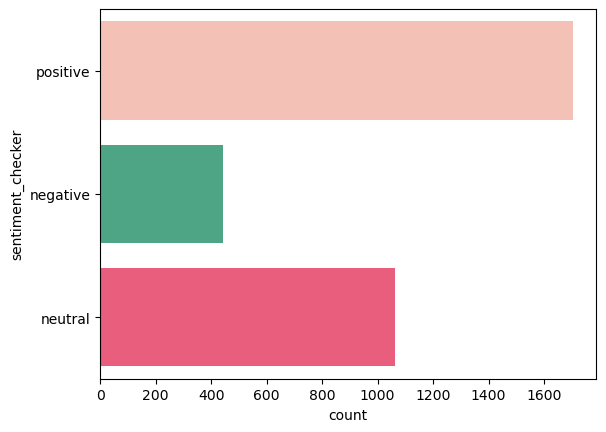

In [147]:
# visualize each of sentiments
import seaborn as sns

sns.countplot(y='sentiment_checker', data=df, palette=['#febaad',"#3eb489", '#ff476f'])

<AxesSubplot:xlabel='sentiment_checker', ylabel='compound'>

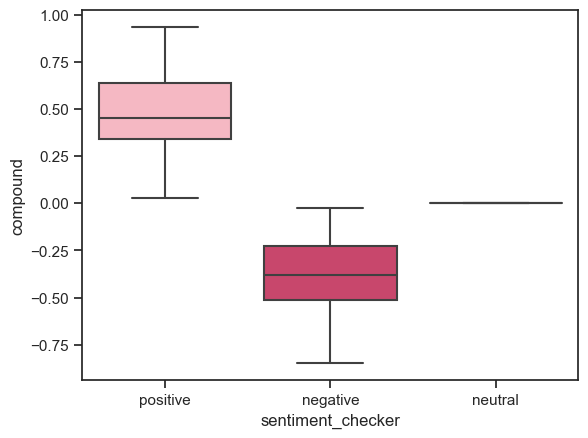

In [182]:
# using boxplot

sns.boxplot(y='compound', x='sentiment_checker', data=df, palette=['#ffaebc', '#de3163', '#d2042d'])

### WordCloud

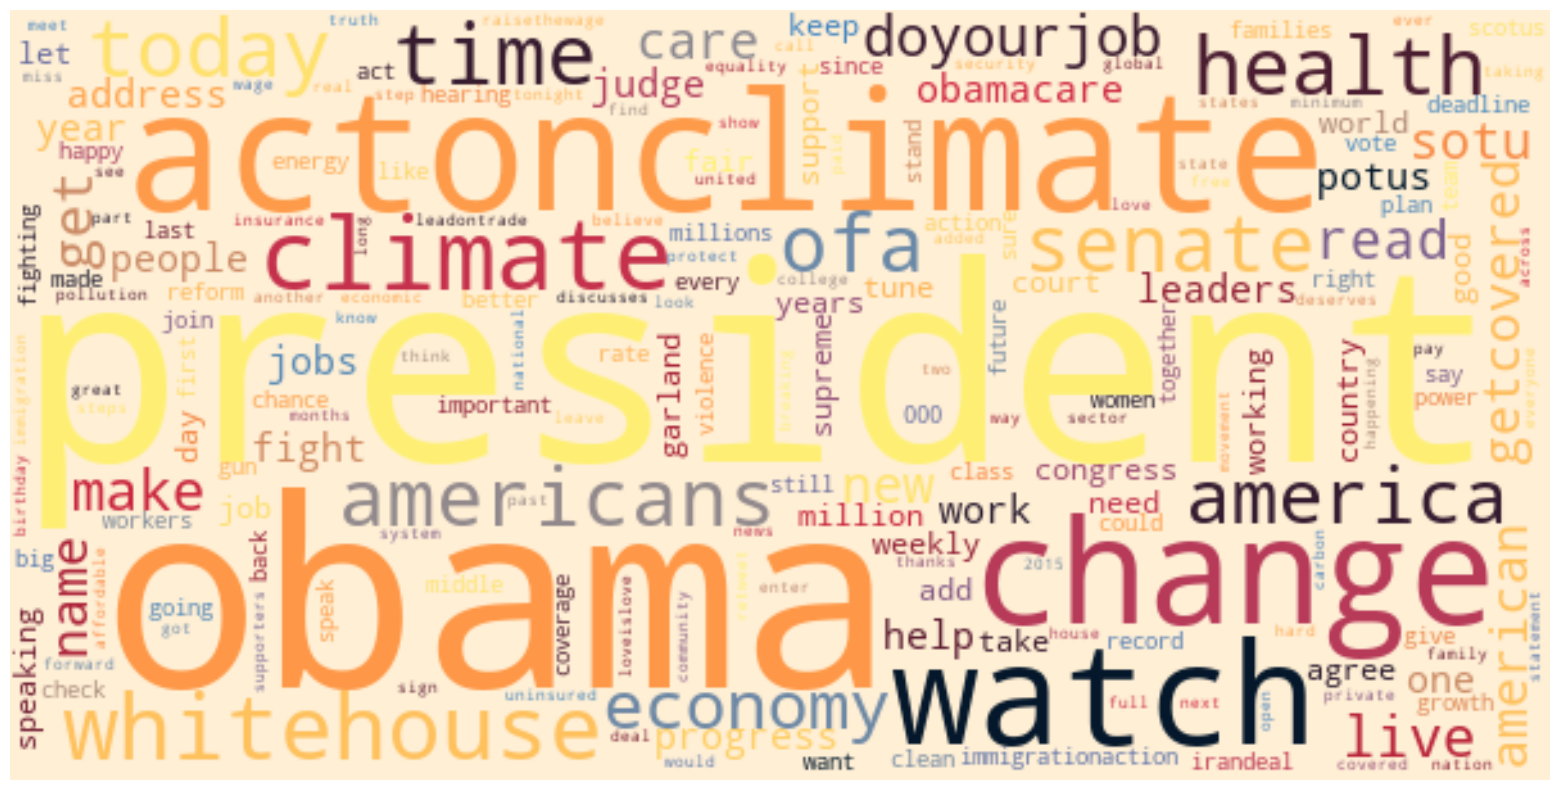

In [167]:
from texthero import visualization as viz

viz.wordcloud(df['lemmatize_words'], width=600, height=300)

In [174]:
# we can show wordcloud using another technique

join_lemma_words = ' '.join(word for word in df['lemmatize_words'])

(-0.5, 599.5, 399.5, -0.5)

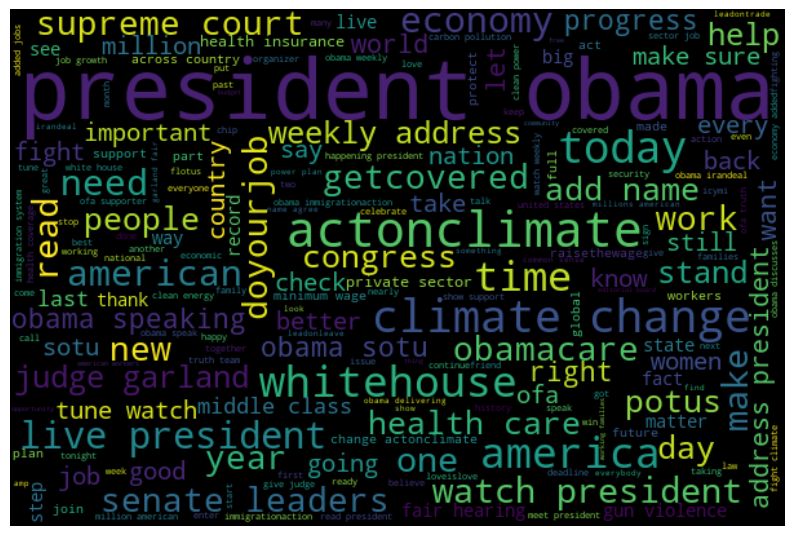

In [173]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(height=400, width=600, max_font_size=100, random_state=2).generate(join_lemma_words)
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

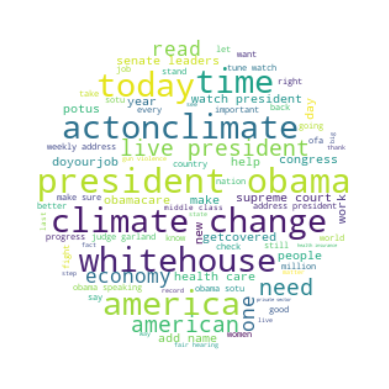

In [175]:
import numpy as np

x,y = np.ogrid[:300, :300]
mask = (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)

wc.generate(join_lemma_words)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

In [181]:
# top ten words 

import plotly.express as pe

fig = pe.bar(y=fdist.index, x=fdist.values)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()